In [1]:
import scperturb

In [2]:
import scanpy

In [3]:
print(scanpy.__version__)

1.9.1


In [4]:
import pandas as pd
import numpy as np

In [5]:
import anndata
print(anndata.__version__)

0.8.0


In [6]:
import scanpy as sc

# replace 'path/to/file.h5ad' with the actual path to your file
path = '/Mounts/rbg-storage1/users/johnyang/cellot/datasets/AissaBenevolenskaya2021.h5ad'
adata = sc.read(path)

In [7]:
adata

AnnData object with n_obs × n_vars = 119071 × 17820
    obs: 'GEO', 'time', 'cell_line', 'perturbation', 'batch', 'subseries', 'replicate', 'tissue_type', 'cancer', 'perturbation_type', 'disease', 'celltype', 'organism', 'nperts', 'ncounts', 'ngenes', 'percent_mito', 'percent_ribo', 'chembl-ID'
    var: 'mt', 'ribo', 'ncounts', 'ncells'

In [8]:
adata.obs['perturbation'].value_counts()

control                   29983
osimertinib               29963
crizotinib                29785
osimertinib+crizotinib    29340
Name: perturbation, dtype: int64

In [9]:
adata.obs

,GEO,time,cell_line,perturbation,batch,subseries,replicate,tissue_type,cancer,perturbation_type,disease,celltype,organism,nperts,ncounts,ngenes,percent_mito,percent_ribo,chembl-ID
cell_barcode,,,,,,,,,,,,,,,,,,,
AAAAACCCGGAA-GSM4869650,GSM4869650,72,PC9_xenograft,control,Xenograft,GSE160244,,cell_line,True,drug,,,human,1,0.0,0,NaN,NaN,NaN
AAAAACCCGGAG-GSM4869650,GSM4869650,72,PC9_xenograft,control,Xenograft,GSE160244,,cell_line,True,drug,,,human,1,0.0,0,NaN,NaN,NaN
AAAAACCCGGAT-GSM4869650,GSM4869650,72,PC9_xenograft,control,Xenograft,GSE160244,,cell_line,True,drug,,,human,1,0.0,0,NaN,NaN,NaN
AAAAACGGTCTT-GSM4869650,GSM4869650,72,PC9_xenograft,control,Xenograft,GSE160244,,cell_line,True,drug,,,human,1,96.0,78,14.583333,9.375000,NaN
AAAAACTTGTAC-GSM4869650,GSM4869650,72,PC9_xenograft,control,Xenograft,GSE160244,,cell_line,True,drug,,,human,1,133.0,114,3.007519,28.571430,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTTTTTAGCAA-GSM4869653,GSM4869653,72,PC9_xenograft,osimertinib+crizotinib,Xenograft,GSE160244,,cell_line,True,drug,,,human,1,148.0,117,0.675676,12.837837,CHEMBL3353410;CHEMBL601719
TTTTTTTGCAAA-GSM4869653,GSM4869653,72,PC9_xenograft,osimertinib+crizotinib,Xenograft,GSE160244,,cell_line,True,drug,,,human,1,215.0,168,1.860465,15.813954,CHEMBL3353410;CHEMBL601719
TTTTTTTGTTGC-GSM4869653,GSM4869653,72,PC9_xenograft,osimertinib+crizotinib,Xenograft,GSE160244,,cell_line,True,drug,,,human,1,33.0,17,57.575756,9.090909,CHEMBL3353410;CHEMBL601719


In [10]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Histogram of counts per cell for Aisaa 2021 Dataset')

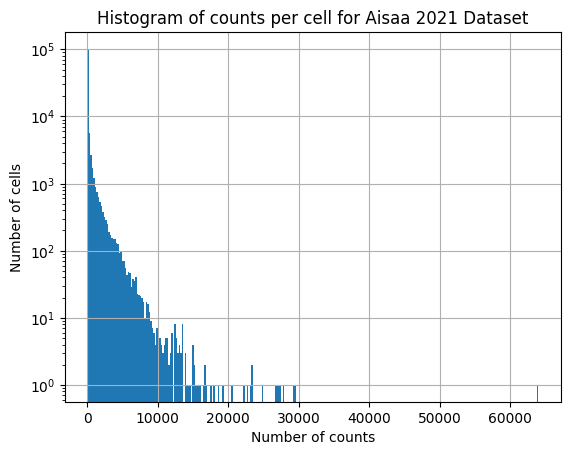

In [11]:
adata.obs['ncounts'].hist(bins=300, log=True)
plt.xlabel('Number of counts')
plt.ylabel('Number of cells')
plt.title('Histogram of counts per cell for Aisaa 2021 Dataset')

In [12]:
adata[adata.obs['ncounts'] > 100]

View of AnnData object with n_obs × n_vars = 42501 × 17820
    obs: 'GEO', 'time', 'cell_line', 'perturbation', 'batch', 'subseries', 'replicate', 'tissue_type', 'cancer', 'perturbation_type', 'disease', 'celltype', 'organism', 'nperts', 'ncounts', 'ngenes', 'percent_mito', 'percent_ribo', 'chembl-ID'
    var: 'mt', 'ribo', 'ncounts', 'ncells'

In [13]:
adata.obs['time'].unique()

array([72])

In [14]:
len(adata.obs.perturbation.cat.categories)

4

In [15]:
adata.obs['celltype']

cell_barcode
AAAAACCCGGAA-GSM4869650     
AAAAACCCGGAG-GSM4869650     
AAAAACCCGGAT-GSM4869650     
AAAAACGGTCTT-GSM4869650     
AAAAACTTGTAC-GSM4869650     
                          ..
TTTTTTTAGCAA-GSM4869653     
TTTTTTTGCAAA-GSM4869653     
TTTTTTTGTTGC-GSM4869653     
TTTTTTTTTTTG-GSM4869653     
TTTTTTTTTTTT-GSM4869653     
Name: celltype, Length: 119071, dtype: category
Categories (1, object): ['']

In [16]:
adata.obs['nperts'].value_counts()

1    119071
Name: nperts, dtype: int64

In [17]:
adata.obs['ngenes'].value_counts()

0       14580
22       1505
21       1488
24       1476
23       1406
        ...  
1941        1
1134        1
1877        1
1262        1
2067        1
Name: ngenes, Length: 2635, dtype: int64

In [18]:
Xa = adata.X.toarray()

In [19]:
Xa[np.where(Xa > 0)]

array([2., 1., 1., ..., 1., 1., 1.], dtype=float32)

In [20]:
DEFAULT_ENCODING = "utf-8"
import json
def read_vocab(path):
    with open(path, "r", encoding=DEFAULT_ENCODING) as inf:
        return {gene: i for i, gene in enumerate(json.load(inf))}

tokenizer = read_vocab("../vocab_ccle.json")

In [21]:
adata.obs

,GEO,time,cell_line,perturbation,batch,subseries,replicate,tissue_type,cancer,perturbation_type,disease,celltype,organism,nperts,ncounts,ngenes,percent_mito,percent_ribo,chembl-ID
cell_barcode,,,,,,,,,,,,,,,,,,,
AAAAACCCGGAA-GSM4869650,GSM4869650,72,PC9_xenograft,control,Xenograft,GSE160244,,cell_line,True,drug,,,human,1,0.0,0,NaN,NaN,NaN
AAAAACCCGGAG-GSM4869650,GSM4869650,72,PC9_xenograft,control,Xenograft,GSE160244,,cell_line,True,drug,,,human,1,0.0,0,NaN,NaN,NaN
AAAAACCCGGAT-GSM4869650,GSM4869650,72,PC9_xenograft,control,Xenograft,GSE160244,,cell_line,True,drug,,,human,1,0.0,0,NaN,NaN,NaN
AAAAACGGTCTT-GSM4869650,GSM4869650,72,PC9_xenograft,control,Xenograft,GSE160244,,cell_line,True,drug,,,human,1,96.0,78,14.583333,9.375000,NaN
AAAAACTTGTAC-GSM4869650,GSM4869650,72,PC9_xenograft,control,Xenograft,GSE160244,,cell_line,True,drug,,,human,1,133.0,114,3.007519,28.571430,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTTTTTAGCAA-GSM4869653,GSM4869653,72,PC9_xenograft,osimertinib+crizotinib,Xenograft,GSE160244,,cell_line,True,drug,,,human,1,148.0,117,0.675676,12.837837,CHEMBL3353410;CHEMBL601719
TTTTTTTGCAAA-GSM4869653,GSM4869653,72,PC9_xenograft,osimertinib+crizotinib,Xenograft,GSE160244,,cell_line,True,drug,,,human,1,215.0,168,1.860465,15.813954,CHEMBL3353410;CHEMBL601719
TTTTTTTGTTGC-GSM4869653,GSM4869653,72,PC9_xenograft,osimertinib+crizotinib,Xenograft,GSE160244,,cell_line,True,drug,,,human,1,33.0,17,57.575756,9.090909,CHEMBL3353410;CHEMBL601719


In [22]:
adata.var

,mt,ribo,ncounts,ncells
gene_symbol,,,,
A2M,False,False,33.0,31
A2M-AS1,False,False,8.0,8
A2ML1,False,False,376.0,355
A4GALT,False,False,344.0,332
AAAS,False,False,436.0,419
...,...,...,...,...
ZZZ3,False,False,709.0,659
hsa-mir-1199,False,False,52.0,50
hsa-mir-6080,False,False,172.0,168


In [23]:
import pickle

In [24]:
to_ensg_path = '/data/rsg/nlp/ujp/cellgp/datasets/nano_hugo_to_ensg.pkl'
with open(to_ensg_path, 'rb') as f:
    to_ensg = pickle.load(f)

In [25]:
to_ensg

{'MT-TF': 'ENSG00000210049',
 'MT-RNR1': 'ENSG00000211459',
 'MT-TV': 'ENSG00000210077',
 'MT-RNR2': 'ENSG00000210082',
 'MT-TL1': 'ENSG00000209082',
 'MT-ND1': 'ENSG00000198888',
 'MT-TI': 'ENSG00000210100',
 'MT-TQ': 'ENSG00000210107',
 'MT-TM': 'ENSG00000210112',
 'MT-ND2': 'ENSG00000198763',
 'MT-TW': 'ENSG00000210117',
 'MT-TA': 'ENSG00000210127',
 'MT-TN': 'ENSG00000210135',
 'MT-TC': 'ENSG00000210140',
 'MT-TY': 'ENSG00000210144',
 'MT-CO1': 'ENSG00000198804',
 'MT-TS1': 'ENSG00000210151',
 'MT-TD': 'ENSG00000210154',
 'MT-CO2': 'ENSG00000198712',
 'MT-TK': 'ENSG00000210156',
 'MT-ATP8': 'ENSG00000228253',
 'MT-ATP6': 'ENSG00000198899',
 'MT-CO3': 'ENSG00000198938',
 'MT-TG': 'ENSG00000210164',
 'MT-ND3': 'ENSG00000198840',
 'MT-TR': 'ENSG00000210174',
 'MT-ND4L': 'ENSG00000212907',
 'MT-ND4': 'ENSG00000198886',
 'MT-TH': 'ENSG00000210176',
 'MT-TS2': 'ENSG00000210184',
 'MT-TL2': 'ENSG00000210191',
 'MT-ND5': 'ENSG00000198786',
 'MT-ND6': 'ENSG00000198695',
 'MT-TE': 'ENSG00000

In [26]:
adata.var

,mt,ribo,ncounts,ncells
gene_symbol,,,,
A2M,False,False,33.0,31
A2M-AS1,False,False,8.0,8
A2ML1,False,False,376.0,355
A4GALT,False,False,344.0,332
AAAS,False,False,436.0,419
...,...,...,...,...
ZZZ3,False,False,709.0,659
hsa-mir-1199,False,False,52.0,50
hsa-mir-6080,False,False,172.0,168


In [27]:
adata.var.index

Index(['A2M', 'A2M-AS1', 'A2ML1', 'A4GALT', 'AAAS', 'AACS', 'AADAC', 'AADAT',
       'AAED1', 'AAGAB',
       ...
       'ZXDC', 'ZYG11A', 'ZYG11B', 'ZYX', 'ZZEF1', 'ZZZ3', 'hsa-mir-1199',
       'hsa-mir-6080', 'hsa-mir-6723', 'hsa-mir-8072'],
      dtype='object', name='gene_symbol', length=17820)

In [28]:
adata.var['ensg'] = adata.var.index.map(to_ensg)

In [29]:
adata.var

,mt,ribo,ncounts,ncells,ensg
gene_symbol,,,,,
A2M,False,False,33.0,31,ENSG00000175899
A2M-AS1,False,False,8.0,8,ENSG00000245105
A2ML1,False,False,376.0,355,ENSG00000166535
A4GALT,False,False,344.0,332,ENSG00000128274
AAAS,False,False,436.0,419,ENSG00000094914
...,...,...,...,...,...
ZZZ3,False,False,709.0,659,ENSG00000036549
hsa-mir-1199,False,False,52.0,50,NaN
hsa-mir-6080,False,False,172.0,168,NaN


In [33]:
adata.var[adata.var['ensg'].isna() == False]

,mt,ribo,ncounts,ncells,ensg
gene_symbol,,,,,
A2M,False,False,33.0,31,ENSG00000175899
A2M-AS1,False,False,8.0,8,ENSG00000245105
A2ML1,False,False,376.0,355,ENSG00000166535
A4GALT,False,False,344.0,332,ENSG00000128274
AAAS,False,False,436.0,419,ENSG00000094914
...,...,...,...,...,...
ZYG11A,False,False,55.0,53,ENSG00000203995
ZYG11B,False,False,614.0,566,ENSG00000162378
ZYX,False,False,1658.0,1453,ENSG00000159840


In [52]:
tokenizer.keys()

dict_keys(['[PAD]', '[MASK]', '[BOS]', '[EOS]', '[SEP]', 'ENSG00000000003.15', 'ENSG00000000005.6', 'ENSG00000000419.12', 'ENSG00000000457.14', 'ENSG00000000460.17', 'ENSG00000000938.13', 'ENSG00000000971.15', 'ENSG00000001036.14', 'ENSG00000001084.13', 'ENSG00000001167.14', 'ENSG00000001460.18', 'ENSG00000001461.17', 'ENSG00000001497.16', 'ENSG00000001561.7', 'ENSG00000001617.12', 'ENSG00000001626.15', 'ENSG00000001629.10', 'ENSG00000001630.17', 'ENSG00000001631.15', 'ENSG00000002016.18', 'ENSG00000002079.14', 'ENSG00000002330.13', 'ENSG00000002549.12', 'ENSG00000002586.20', 'ENSG00000002587.10', 'ENSG00000002726.20', 'ENSG00000002745.13', 'ENSG00000002746.15', 'ENSG00000002822.15', 'ENSG00000002834.18', 'ENSG00000002919.14', 'ENSG00000002933.9', 'ENSG00000003056.8', 'ENSG00000003096.14', 'ENSG00000003137.8', 'ENSG00000003147.19', 'ENSG00000003249.13', 'ENSG00000003393.15', 'ENSG00000003400.14', 'ENSG00000003402.20', 'ENSG00000003436.16', 'ENSG00000003509.16', 'ENSG00000003756.17', 'E

In [58]:
ensgs = set(only_ensg.var['ensg'])

In [59]:
ensgs

{'ENSG00000157191',
 'ENSG00000115274',
 'ENSG00000175449',
 'ENSG00000166200',
 'ENSG00000218819',
 'ENSG00000206559',
 'ENSG00000078967',
 'ENSG00000138685',
 'ENSG00000162825',
 'ENSG00000121900',
 'ENSG00000273749',
 'ENSG00000167693',
 'ENSG00000167766',
 'ENSG00000180176',
 'ENSG00000108239',
 'ENSG00000165059',
 'ENSG00000274985',
 'ENSG00000250045',
 'ENSG00000170142',
 'ENSG00000213512',
 'ENSG00000260014',
 'ENSG00000182185',
 'ENSG00000124486',
 'ENSG00000183287',
 'ENSG00000147364',
 'ENSG00000158161',
 'ENSG00000170113',
 'ENSG00000149657',
 'ENSG00000188846',
 'ENSG00000182463',
 'ENSG00000065491',
 'ENSG00000145241',
 'ENSG00000185627',
 'ENSG00000133773',
 'ENSG00000176054',
 'ENSG00000116096',
 'ENSG00000143850',
 'ENSG00000101473',
 'ENSG00000214222',
 'ENSG00000108349',
 'ENSG00000227372',
 'ENSG00000007255',
 'ENSG00000240541',
 'ENSG00000147905',
 'ENSG00000176142',
 'ENSG00000146243',
 'ENSG00000167614',
 'ENSG00000173156',
 'ENSG00000100280',
 'ENSG00000179598',


In [60]:
tok_keys = {x.split('.')[0] for x in tokenizer.keys()}

In [61]:
in_vocab = ensgs.intersection(tok_keys)

In [63]:
len(in_vocab)

14079

In [34]:
adata.var['ensg'].isna() == False

gene_symbol
A2M              True
A2M-AS1          True
A2ML1            True
A4GALT           True
AAAS             True
                ...  
ZZZ3             True
hsa-mir-1199    False
hsa-mir-6080    False
hsa-mir-6723    False
hsa-mir-8072    False
Name: ensg, Length: 17820, dtype: bool

In [43]:
only_ensg = adata[:, adata.var['ensg'].isna() == False]

In [44]:
only_ensg

View of AnnData object with n_obs × n_vars = 119071 × 14079
    obs: 'GEO', 'time', 'cell_line', 'perturbation', 'batch', 'subseries', 'replicate', 'tissue_type', 'cancer', 'perturbation_type', 'disease', 'celltype', 'organism', 'nperts', 'ncounts', 'ngenes', 'percent_mito', 'percent_ribo', 'chembl-ID'
    var: 'mt', 'ribo', 'ncounts', 'ncells', 'ensg'

In [31]:
import biomart

In [32]:
import requests

def get_ensembl_id(gene_symbol):
    server = "https://rest.ensembl.org"
    ext = f"/xrefs/symbol/homo_sapiens/{gene_symbol}?content-type=application/json"
    response = requests.get(server + ext, headers={"Content-Type": "application/json"})
    
    if not response.ok:
        return None
    
    data = response.json()
    for entry in data:
        if entry.get('dbname') == 'EnsemblGene':
            v = entry.get('primary_id')
            print(v)
            return v
    print('Not found')
    return None

gene_symbols = adata.var[adata.var['ensg'].isna()].index
ensembl_ids = {gene: get_ensembl_id(gene) for gene in gene_symbols}


Not found
Not found
Not found


KeyboardInterrupt: 

In [76]:
from biomart import BiomartServer
server = BiomartServer( "http://www.biomart.org/biomart" )

# set verbose to True to get some messages
server.verbose = True

HTTPError: 404 Client Error: Not Found for url: http://www.biomart.org/biomart/martservice

In [14]:
from cellot.data.cell import AnnDataDataset

/data/rsg/chemistry/johnyang/miniconda3/envs/cot2/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
adata.obs.perturbation.cat.categories

Index(['control', 'crizotinib', 'osimertinib', 'osimertinib+crizotinib'], dtype='object')

In [16]:
ds = AnnDataDataset(adata, obs='perturbation', categories=sorted(adata.obs.perturbation.cat.categories))

In [45]:
# perform PCA on the data
sc.tl.pca(only_ensg)

/data/rsg/chemistry/johnyang/miniconda3/envs/cot2/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


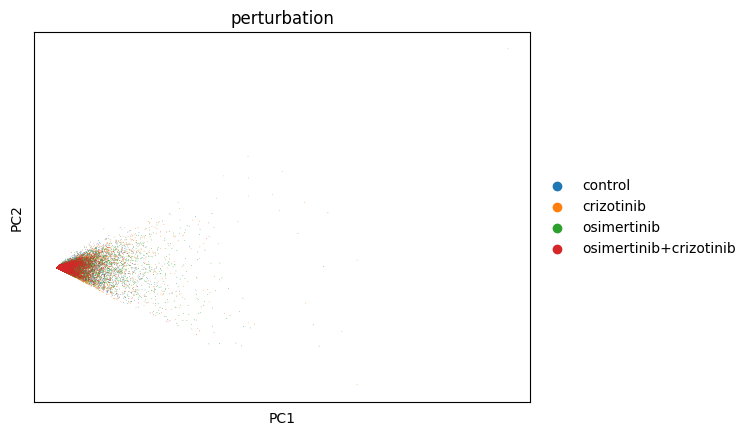

In [46]:
sc.pl.pca(only_ensg, color='perturbation')

In [47]:
only_ensg

AnnData object with n_obs × n_vars = 119071 × 14079
    obs: 'GEO', 'time', 'cell_line', 'perturbation', 'batch', 'subseries', 'replicate', 'tissue_type', 'cancer', 'perturbation_type', 'disease', 'celltype', 'organism', 'nperts', 'ncounts', 'ngenes', 'percent_mito', 'percent_ribo', 'chembl-ID'
    var: 'mt', 'ribo', 'ncounts', 'ncells', 'ensg'
    uns: 'pca', 'perturbation_colors'
    obsm: 'X_pca'
    varm: 'PCs'

In [48]:
import scanpy as sc
import matplotlib.pyplot as plt

# Assuming `a549` is your AnnData object
# Check if UMAP is already computed, if not, compute UMAP
# if 'X_umap' not in adata.obsm.keys():
sc.pp.neighbors(only_ensg, use_rep='X_pca')
sc.tl.umap(only_ensg)

/data/rsg/chemistry/johnyang/miniconda3/envs/cot2/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/data/rsg/chemistry/johnyang/miniconda3/envs/cot2/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/data/rsg/chemistry/johnyang/miniconda3/en

/data/rsg/chemistry/johnyang/miniconda3/envs/cot2/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


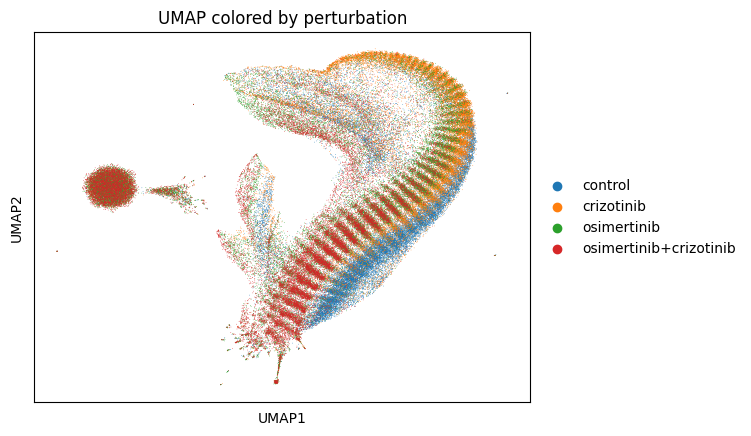

In [50]:
# Plot UMAP
sc.pl.umap(only_ensg, color='perturbation', title='UMAP colored by perturbation')

plt.show()

In [22]:
adata

AnnData object with n_obs × n_vars = 119071 × 17820
    obs: 'GEO', 'time', 'cell_line', 'perturbation', 'batch', 'subseries', 'replicate', 'tissue_type', 'cancer', 'perturbation_type', 'disease', 'celltype', 'organism', 'nperts', 'ncounts', 'ngenes', 'percent_mito', 'percent_ribo', 'chembl-ID'
    var: 'mt', 'ribo', 'ncounts', 'ncells'
    uns: 'pca', 'perturbation_colors', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [46]:
import re

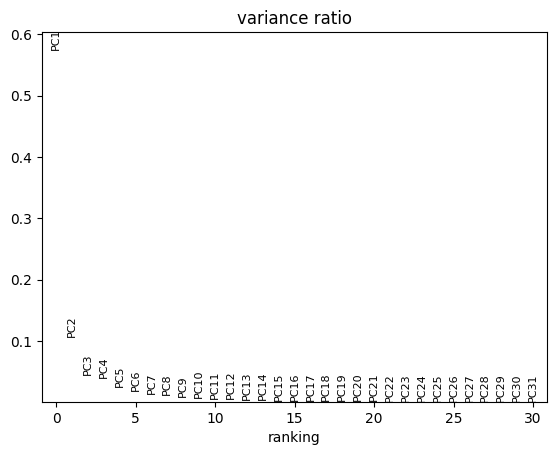

In [ ]:
sc.pl.pca_variance_ratio(adata)

In [ ]:
adata.obs['perturbation_category'] = adata.obs['perturbation'].astype('category')
adata.obs['perturbation_category']

cell_barcode
AAACATACAAGATG     63(mod)_pBA580
AAACATACACCTAG        OST4_pDS353
AAACATACTTCCCG     SEC61A1_pDS031
AAACATTGAAACAG      EIF2B4_pDS491
AAACATTGCAGCTA        SRPR_pDS482
                       ...       
TTTGCATGCTTTAC       STT3A_pDS011
TTTGCATGGAGGAC    ARHGAP22_pDS458
TTTGCATGTAGAGA     63(mod)_pBA580
TTTGCATGTCAAGC      KCTD16_pDS096
TTTGCATGTGGAGG      SAMM50_pDS156
Name: perturbation_category, Length: 65337, dtype: category
Categories (114, object): ['62(mod)_pBA581', '63(mod)_pBA580', '*', 'AARS_pDS381', ..., 'XRN1_pDS411', 'YIPF5_pDS001', 'YIPF5_pDS186', 'YIPF5_pDS226']

In [ ]:
sc.set_figure_params(scanpy=True, color_map='viridis')


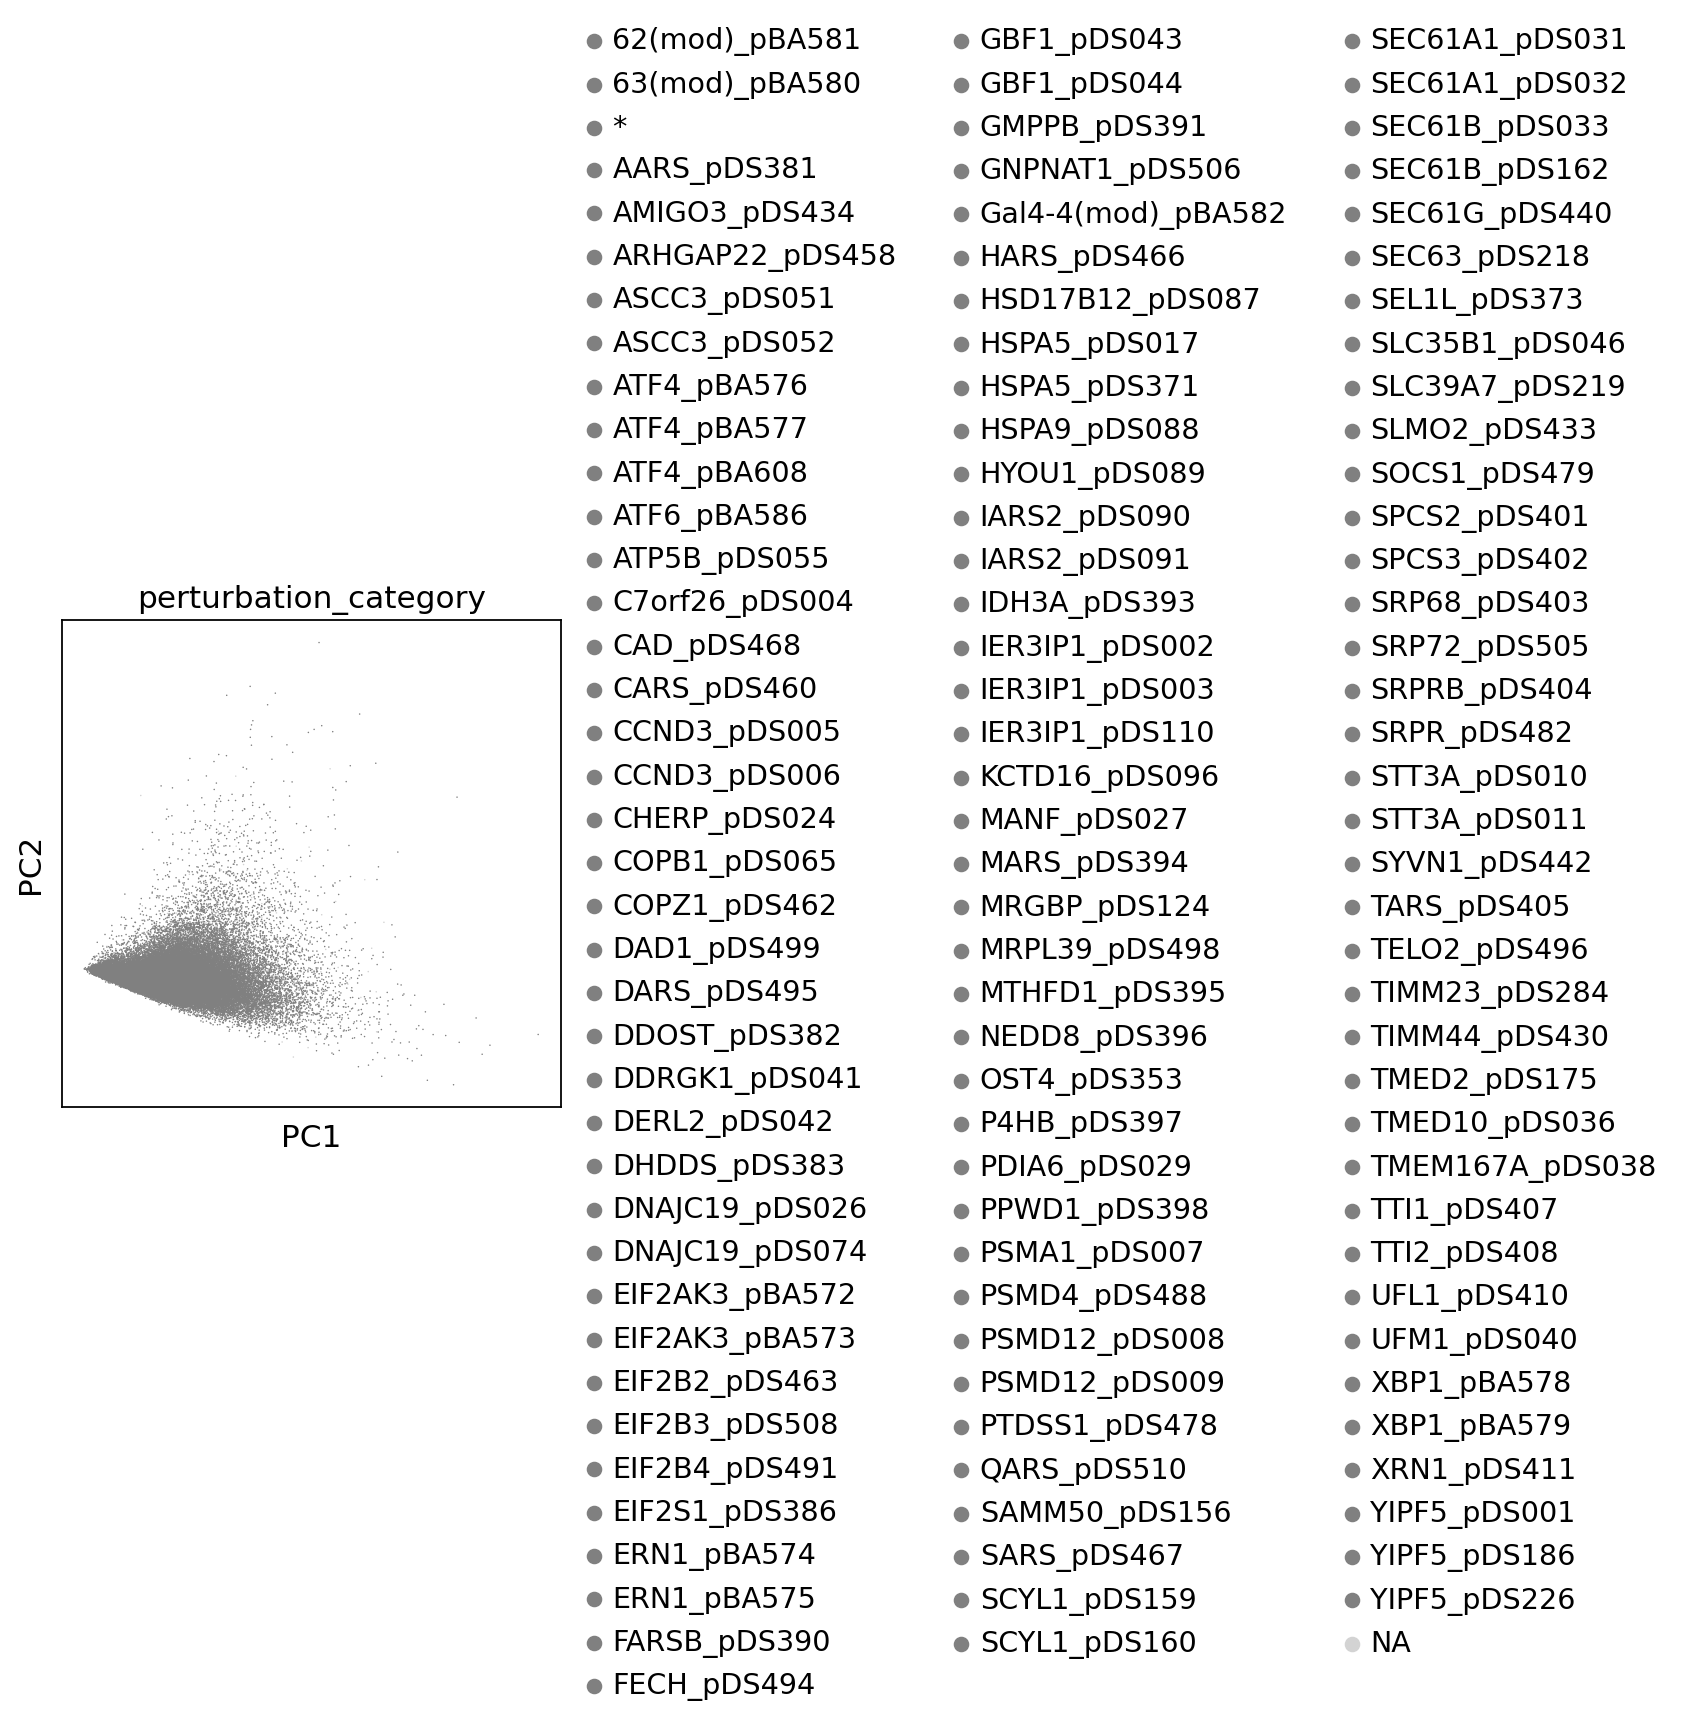

In [76]:
sc.pl.pca(adata, color='perturbation_category')

In [80]:
adata.obs['perturbation'] = adata.obs['perturbation'].astype('object')

In [83]:
adata.obs.perturbation = adata.obs.perturbation.fillna('nan')

In [84]:
adata_subset = adata[adata.obs['perturbation'].str.startswith(('ATF', 'XBP'))]

In [90]:
import matplotlib.colors as mcolors

/data/rsg/chemistry/johnyang/miniconda3/envs/cot2/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
2023-08-05 16:20:01,415 *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
2023-08-05 16:20:01,418 *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
2023-08-05 16:20:01,422 *c* argument looks like a single numeric RGB or RGBA sequence, wh

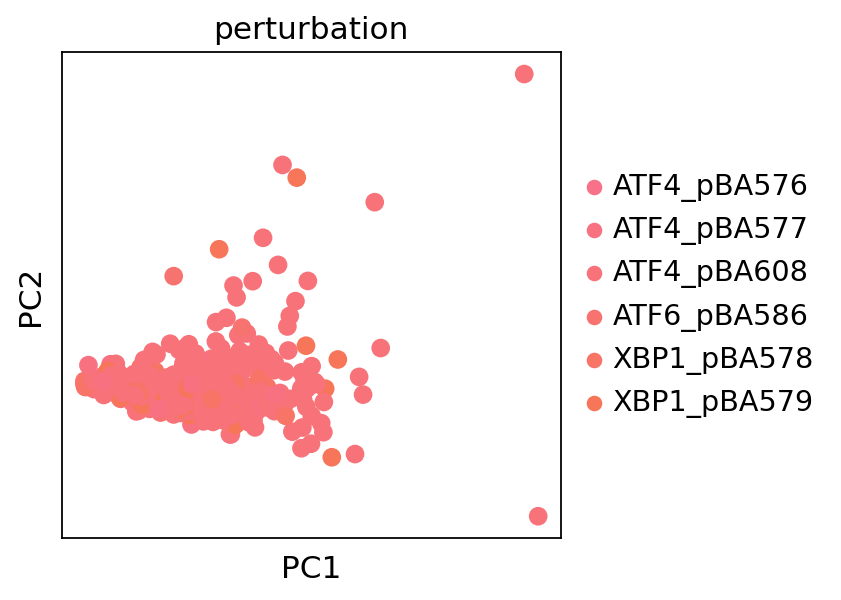

In [89]:
import seaborn as sns

# Assuming 'adata' is your AnnData object

# Get unique perturbation categories
perturbations = adata_subset.obs['perturbation'].unique()

# Create a color palette
palette = sns.color_palette('husl', n_colors=len(perturbations))

# Create a color map (dictionary) from perturbations to colors
color_map = dict(zip(perturbations, palette))

# Assign colors to perturbations
adata.uns['perturbation_colors'] = [color_map[p] for p in perturbations]

# Plot
sc.pl.pca(adata_subset, color='perturbation')


2023-08-05 16:20:49,363 *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
2023-08-05 16:20:49,366 *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
2023-08-05 16:20:49,370 *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA

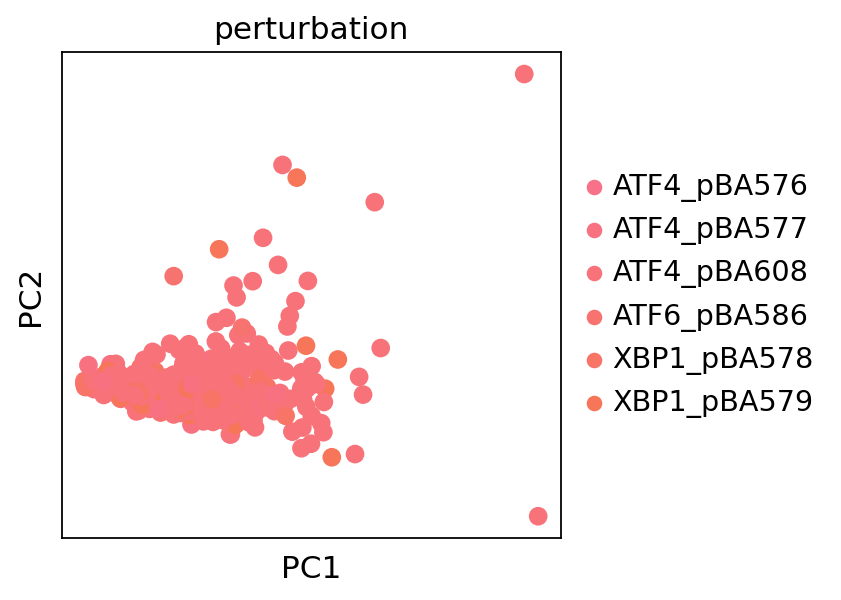

In [91]:
# Create a matplotlib colormap from the color map
cmap = mcolors.ListedColormap(palette)

# Plot the PCA using the colormap
sc.pl.pca(adata_subset, color='perturbation', cmap=cmap)

2023-08-05 16:22:16,080 Note: detected 80 virtual cores but NumExpr set to maximum of 64, check "NUMEXPR_MAX_THREADS" environment variable.
2023-08-05 16:22:16,081 Note: NumExpr detected 80 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2023-08-05 16:22:16,082 NumExpr defaulting to 8 threads.


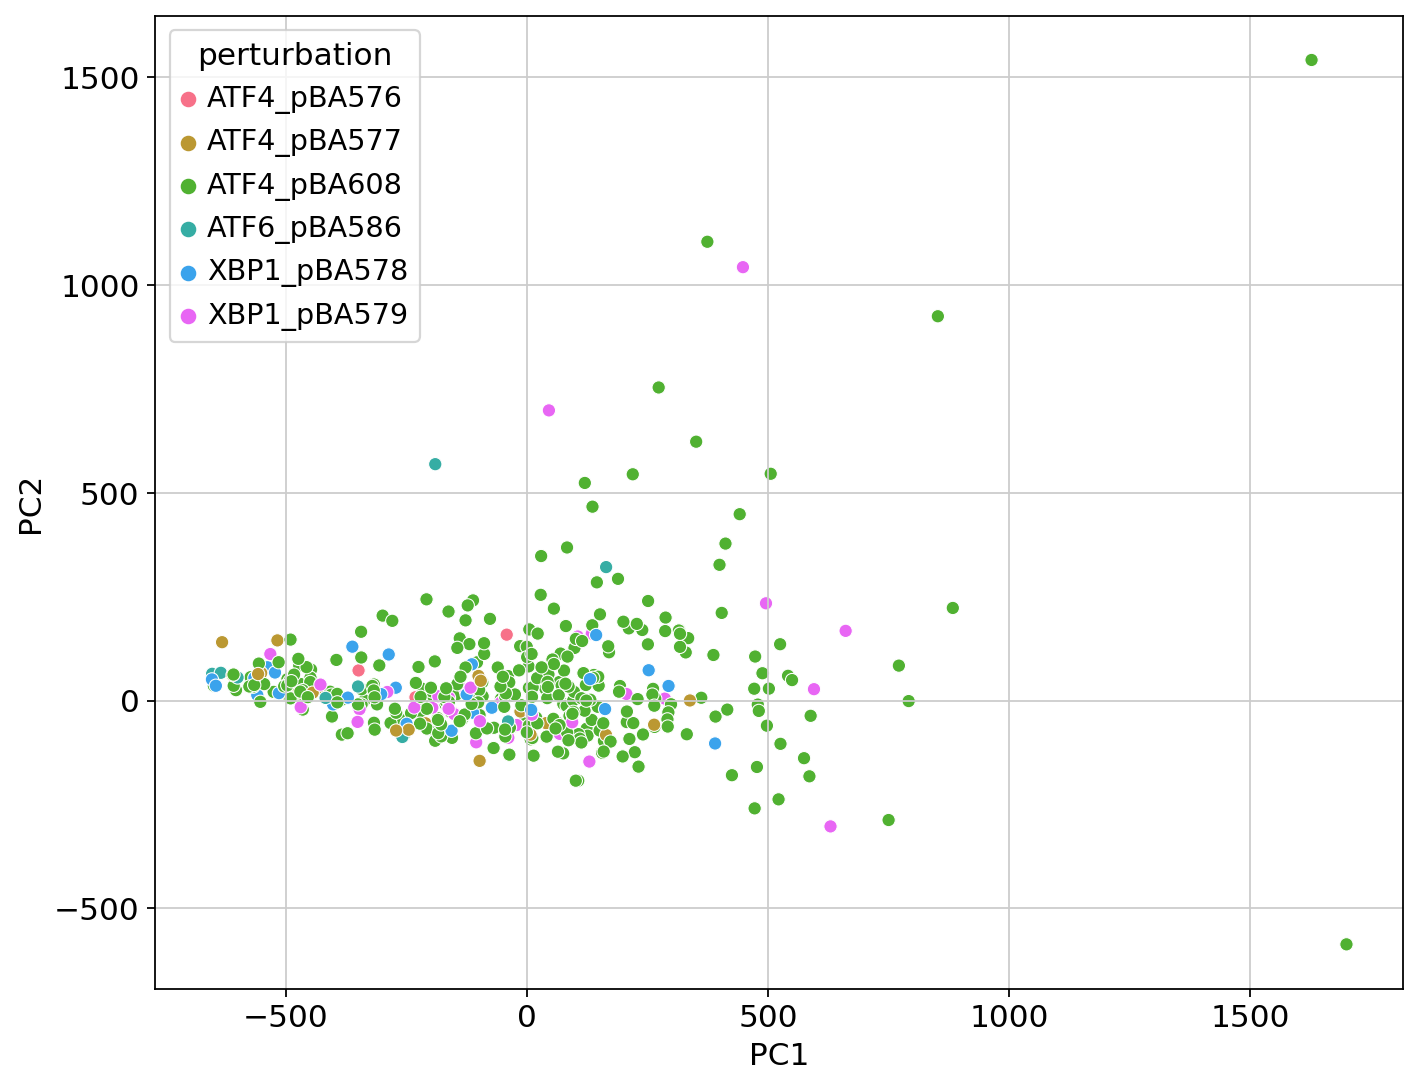

In [92]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your PCA data is stored in adata.obsm['X_pca']

# Get the PCA data
pca_data = adata_subset.obsm['X_pca']

# Create a DataFrame
df = pd.DataFrame(pca_data[:, :2], columns=['PC1', 'PC2'])

# Add the 'perturbation' data to the DataFrame
df['perturbation'] = adata_subset.obs['perturbation'].values

# Plot using seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='perturbation', palette='husl')
plt.show()


/data/rsg/chemistry/johnyang/miniconda3/envs/cot2/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/data/rsg/chemistry/johnyang/miniconda3/envs/cot2/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
2023-08-05 16:23:04,670 *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
2023-08-05 16:23:04,673 *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please us

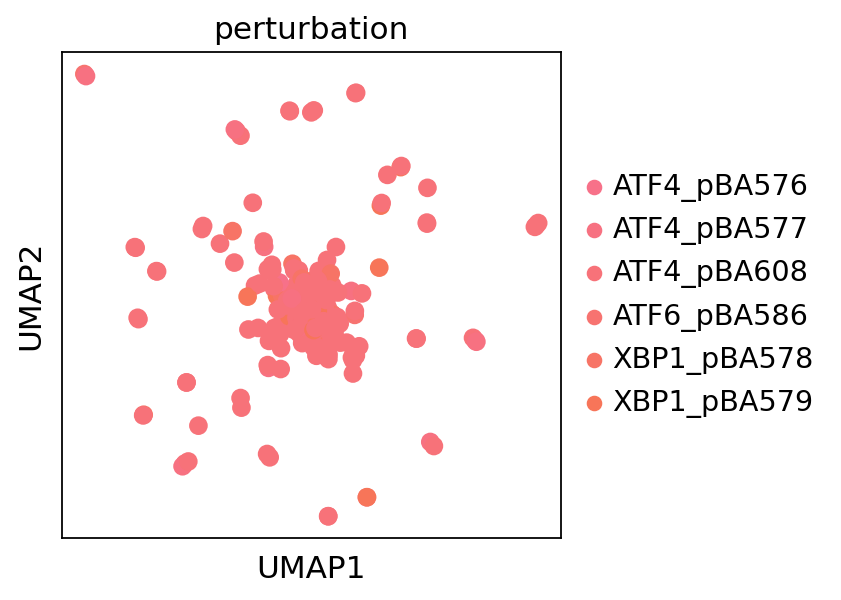

In [93]:
import scanpy as sc

# Run the UMAP algorithm
sc.tl.umap(adata_subset)

# Plot the result
sc.pl.umap(adata_subset, color='perturbation')


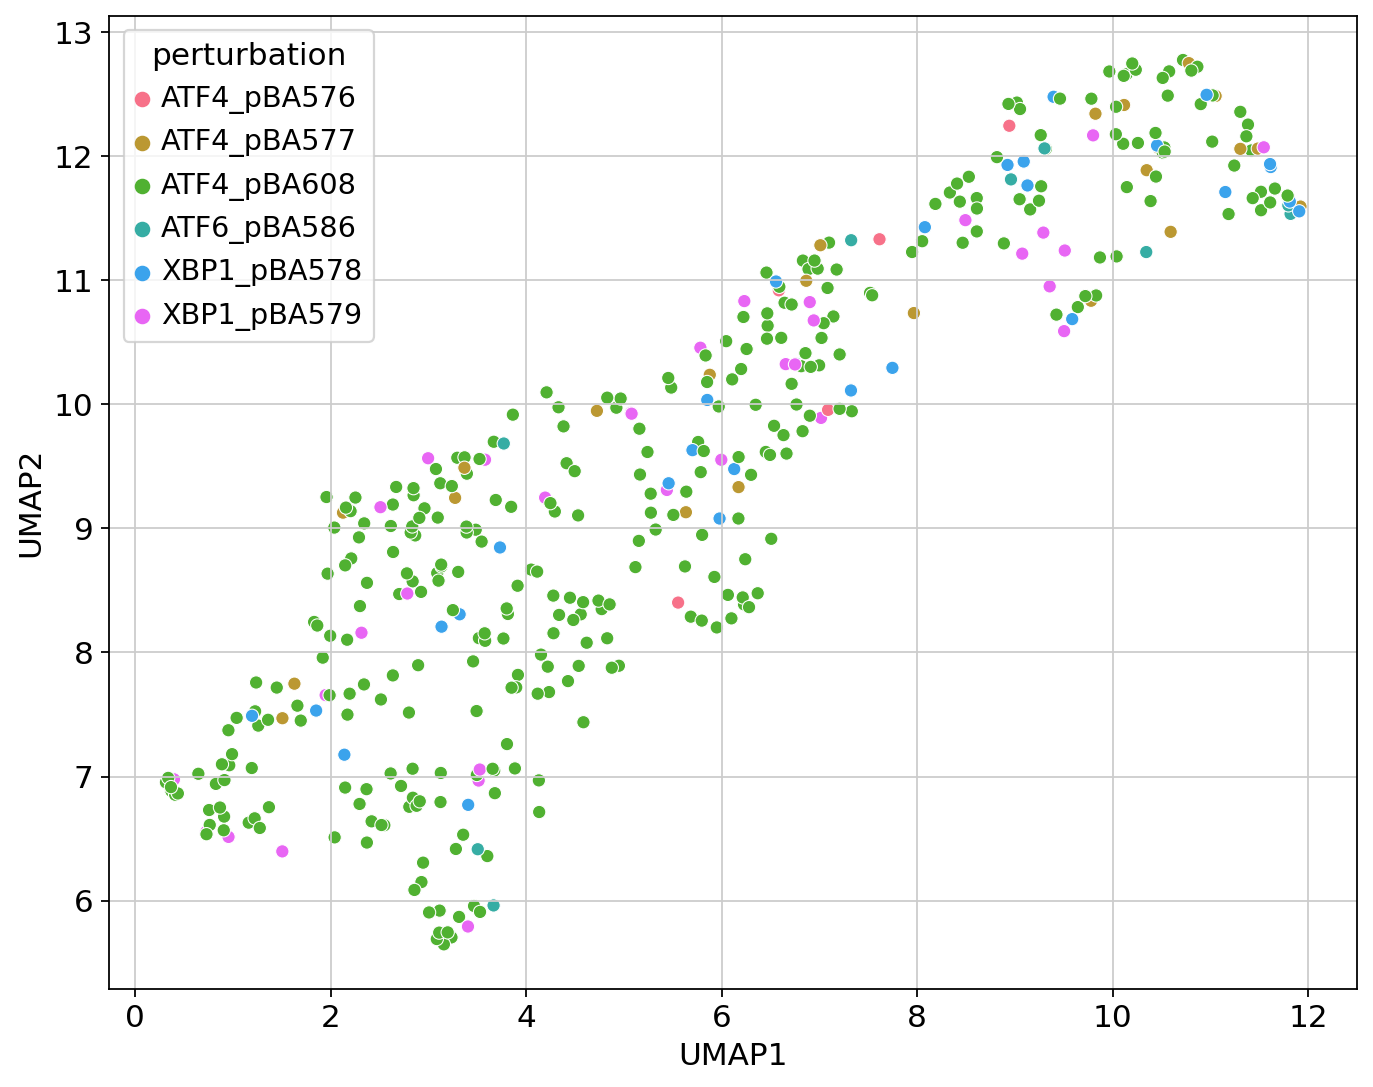

In [94]:
import umap
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Get the matrix of values (assuming adata_subset.X contains the data you want to use for UMAP)
data = adata_subset.X

# Create a UMAP instance and perform UMAP
reducer = umap.UMAP()
embedding = reducer.fit_transform(data)

# Create a DataFrame
df = pd.DataFrame(embedding, columns=['UMAP1', 'UMAP2'])

# Add the 'perturbation' data to the DataFrame
df['perturbation'] = adata_subset.obs['perturbation'].values

# Plot using seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='UMAP1', y='UMAP2', hue='perturbation', palette='husl')
plt.show()


In [59]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=50)


In [57]:
adata

AnnData object with n_obs × n_vars = 65337 × 32738
    obs: 'perturbation', 'read count', 'UMI count', 'tissue_type', 'cell_line', 'cancer', 'disease', 'perturbation_type', 'celltype', 'organism', 'ncounts', 'ngenes', 'percent_mito', 'percent_ribo', 'nperts'
    var: 'ensembl_id', 'ncounts', 'ncells'
    uns: 'pca', 'neighbors'
    obsm: 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [58]:
adata.uns['neighbors']

OverloadedDict, wrapping:
	{'connectivities_key': 'connectivities', 'distances_key': 'distances', 'params': {'n_neighbors': 10, 'method': 'umap', 'random_state': 0, 'metric': 'euclidean', 'n_pcs': 30}}
With overloaded keys:
	['connectivities', 'distances'].

In [61]:
import matplotlib.pyplot as plt

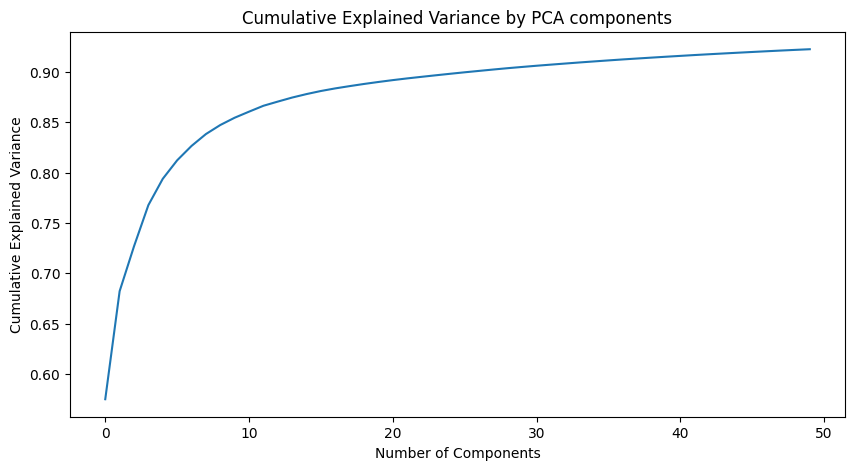

In [62]:
explained_variance_ratio = adata.uns['pca']['variance_ratio']
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 5))
plt.plot(cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA components')
plt.show()

In [65]:
adata.uns['pca']

{'params': {'zero_center': True, 'use_highly_variable': False},
 'variance': array([117818.14   ,  21981.16   ,   9134.054  ,   8386.175  ,
          5346.0557 ,   3760.467  ,   2927.4026 ,   2413.7146 ,
          1843.394  ,   1483.8059 ,   1233.4078 ,   1197.9502 ,
           851.63464,    822.0223 ,    707.8001 ,    626.3233 ,
           530.908  ,    461.6872 ,    439.3643 ,    403.24725,
           378.5303 ,    347.3818 ,    322.33344,    315.20212,
           307.26843,    299.31567,    284.34363,    282.49866,
           272.15024,    248.9595 ,    243.96628,    228.44449,
           222.71909,    220.38629,    209.4483 ,    205.70752,
           198.37921,    186.01907,    183.40446,    179.49297,
           173.03105,    171.55899,    162.30057,    156.81726,
           153.63043,    150.78796,    147.0755 ,    144.04305,
           136.65994,    131.5064 ], dtype=float32),
 'variance_ratio': array([0.5750176 , 0.10728019, 0.04457922, 0.04092916, 0.0260917 ,
        0.0183531

In [70]:
adata.obsm['X_pca'][63832]

array([-5.16183594e+02, -1.91649685e+01,  4.68456917e+01, -2.60188236e+01,
        5.04888992e+01,  3.41604805e+01,  4.00806274e+01,  2.67554874e+01,
       -3.72600479e+01, -4.57629728e+00, -1.05425186e+01,  2.00750828e+01,
        7.69997168e+00, -3.89043897e-01, -2.83032322e+00, -1.67672558e+01,
       -1.27568865e+01, -1.53989525e+01, -5.92528820e+00, -1.88404217e+01,
        2.74292898e+00,  5.51601315e+00,  7.68805456e+00,  3.38254333e+00,
        2.23508418e-01,  8.07301283e-01,  1.65111217e+01, -1.19262385e+00,
       -6.46097183e-01,  7.23748159e+00,  5.05742741e+00,  2.77661419e+00,
       -4.43314600e+00,  3.47444630e+00,  3.39852023e+00,  7.35221529e+00,
        1.65713525e+00, -2.78500128e+00, -9.74660587e+00,  1.07632704e-01,
        9.94420624e+00,  8.68820858e+00, -1.60969675e+00, -5.97494650e+00,
        3.74935007e+00,  1.80668998e+00, -1.09683776e+00, -2.75785569e-02,
        7.06748295e+00, -7.91131973e-01], dtype=float32)